In [12]:
import cv2 as cv
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import os

In [ ]:
kernel_3x3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel_5x5 = np.array([[-1,-1,-1,-1,-1],[-1,1,2,1,-1],[-1,2,4,2,-1],[-1,1,2,1,-1],[-1,-1,-1,-1,-1]])
kernel_7x7 = np.array([[-1,-1,-1,-1,-1,-1,-1],[-1,2,2,2,2,2,-1],[-1,2,4,6,4,2,-1],[-1,2,8,12,8,2,-1],[-1,2,4,6,4,2,-1],[-1,-1,-1,-1,-1,-1,-1]])

In [19]:
def plot_images(*img):
    # Setting the grid size
    plt.figure(figsize=(10,10), layout='constrained')

    # Plotting the original image
    for i in range(len(img)):
        plt.subplot(len(img), 2, i+1)
        #plt.title(f'Image {i+1}')
        plt.imshow(img[i])
        plt.axis('off')

def plot_image(image_dict):
    #Setting the grid size
    plt.figure(figsize=(10,10), layout='constrained')

    # Plotting the original image
    for i, (title, img) in enumerate(image_dict.items()):
        plt.subplot(len(image_dict), 3, i+1)
        plt.title(title)
        plt.imshow(img)
        plt.axis('off')

In [33]:
# read the image
img_gray = cv.imread('latent_fingerprint.png')

# convert to RGB
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [37]:
#define image dictionary
image_dict = {}

# convert to grayscale
#img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
image_dict['Gray'] = img_gray

# apply erosion
kernel = np.ones((3,3),np.uint8)
img_erosion = cv.erode(img_gray, kernel, iterations = 1)
image_dict['Erosion'] = img_erosion

# apply dilation
img_dilation = cv.dilate(img_gray, kernel, iterations = 1)
image_dict['Dilation'] = img_dilation

# apply opening
img_opening = cv.morphologyEx(img_gray, cv.MORPH_OPEN, kernel)
image_dict['Opening'] = img_opening 

# apply closing
img_closing = cv.morphologyEx(img_gray, cv.MORPH_CLOSE, kernel)
image_dict['Closing'] = img_closing

# gradient
img_gradient = cv.morphologyEx(img_gray, cv.MORPH_GRADIENT, kernel)
image_dict['Gradient'] = img_gradient



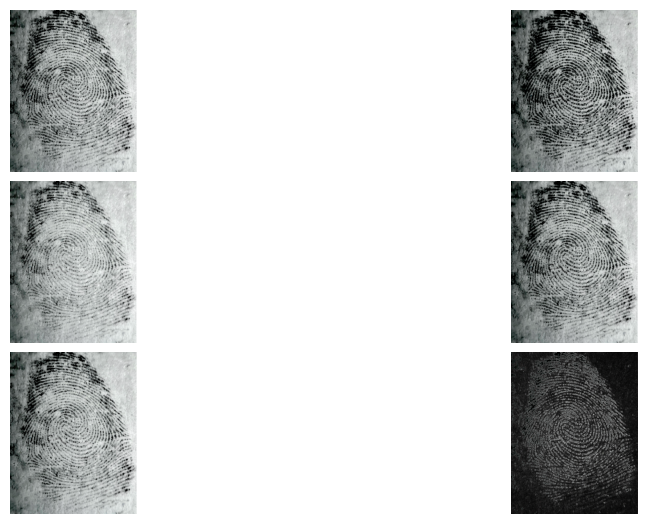

In [38]:
# display images
plot_images(*image_dict.values())

In [ ]:
#define image dictionary
image_dict = {}
# read the image
img = cv.imread('Mod4CT2.jpg')
# define the kernel size
kernel_3x3 = (3,3)
# apply the blur filter
blur_3x3 = cv.blur(img, kernel_3x3)
#plot the image using pyplot
image_dict['Original Image'] = img
image_dict['Blur 3x3'] = blur_3x3

# plot filter
# high pass filter
g_hpf = img - blur_3x3
image_dict['High Pass Filter (3x3)'] = g_hpf
# plot substraction
plot_image(image_dict)


In [ ]:

# sigma value list
sigma_list = [0.5, 3, 5]

# kernel size list
kernel_size_list = [(3, 3), (5, 5), (7, 7)]

# # loop over the kernel size list
# for kernel_size in kernel_size_list:
#     #define image dictionary
#     image_dict = {}
#     # auto calculated sigma
#     blur = cv.GaussianBlur(img, kernel_size, 0)
#     # add to image dictionary
#     image_dict[f'Gaussian Blur {kernel_size}, sigma=auto-calculated'] = blur
#     # high pass filter
#     g_hpf = img - blur
#     image_dict[f'High Pass Filter {kernel_size}, sigma=auto-calculated'] = g_hpf
#     plot_image(image_dict)

# loop over the kernel size list and sigma list
for kernel_size in kernel_size_list:

    for sigma in sigma_list:
        #define image dictionary
        image_dict = {}
        # let's first create a 2D Gaussian kernel
        gaussian_kernel_1 = cv.getGaussianKernel(ksize=kernel_size[0],sigma=sigma)
        gaussian_kernel_2 = cv.getGaussianKernel(ksize=kernel_size[1],sigma=sigma)

        # 2d filter
        blur = cv.sepFilter2D(img,-1,gaussian_kernel_1,gaussian_kernel_2)

        # add to image dictionary
        image_dict[f'Gaussian Blur {kernel_size}, sigma={sigma}'] = blur
        # high pass filter
        g_hpf = img - blur
        image_dict[f'High Pass Filter {kernel_size}, sigma={sigma}'] = g_hpf
        plot_image(image_dict)





In [ ]:
"""
Create a surface plot of a 2D Gaussian function.
"""

from matplotlib import colormaps
from matplotlib.colors import LightSource

n = 3
x = np.arange(-n, n+1, 1)
y = np.arange(-n, n+1, 1)
x, y = np.meshgrid(x, y)

sigma = 1
z = np.exp(-(x*x + y*y)/(2*sigma*sigma))

ls = LightSource()
z = z / z.max()
rgb = ls.shade(z, cmap=colormaps['viridis'], blend_mode='soft')

# Create surface plots
surf_args = dict(
    facecolors = rgb,
    antialiased = False,
    linewidth = 0,
    shade = False,
)
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d', elev=5), dpi=200, figsize=(3, 3))
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
ax.plot_surface(x, y, z, **surf_args)
ax.axis(False)


In [ ]:
import scipy.ndimage as ndimage

# read the image
img = cv.imread('Mod4CT2.jpg')



# now apply gaussian filter
img_blur = cv.GaussianBlur(img, (3,3), 0.5)

# calculate laplacian
img_lap = cv.Laplacian(src=img, ddepth=-1, ksize=9, borderType=cv.BORDER_DEFAULT)

# apply laplacian of gaussian
img_after_lap = img_blur - img_lap

# img_out_log = ndimage.gaussian_filter(img, 1)

# img_out = ndimage.laplace(input=img_out_log, mode='wrap', cval=0.0)



plot_images(img, img_after_lap)


In [ ]:
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gaussian_blurred = cv.GaussianBlur(img, (7,7), 3)

img_grey_blurred = cv.cvtColor(gaussian_blurred, cv.COLOR_BGR2GRAY)

laplacian_of_gaussian = cv.Laplacian(src=img_grey_blurred, ddepth=-1, ksize=3, borderType=cv.BORDER_DEFAULT)

laplacian_of_gaussian = cv.convertScaleAbs(laplacian_of_gaussian)

laplacian = cv.Laplacian(src=img_grey, ddepth=-1, ksize=3, borderType=cv.BORDER_DEFAULT)

laplacian = cv.convertScaleAbs(laplacian)

plot_images(gaussian_blurred, laplacian, laplacian_of_gaussian)